# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [6]:
# 1. mostrar shape e colunas
print("Shape:", sinasc_raw.shape)
print("Colunas:", list(sinasc_raw.columns))

# 2. ver amostra de colunas para inspecionar possíveis nomes de coordenadas
sinasc_raw.head().T  # transposto facilita inspeção

Shape: (27028, 69)
Colunas: ['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO', 'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE', 'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome', 'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea']


,0,1,2,3,4
ORIGEM,1,1,1,1,1
CODESTAB,2679477.0,2679477.0,2679477.0,2516500.0,2516500.0
CODMUNNASC,110001,110001,110001,110001,110001
LOCNASC,1,1,1,1,1
IDADEMAE,19,29,37,30,30
...,...,...,...,...,...
munResUf,Rondônia,Rondônia,Rondônia,Rondônia,Rondônia
munResLat,-11.93554,-11.93554,-11.93554,-12.13178,-11.93554
munResLon,-61.99982,-61.99982,-61.99982,-61.85308,-61.99982
munResAlt,338.0,338.0,338.0,397.0,338.0


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
# 1) garantir que a coluna municipal de latitude é numérica
sinasc['munResLat'] = pd.to_numeric(sinasc['munResLat'], errors='coerce')
print("Nulos em munResLat:", sinasc['munResLat'].isna().sum())

# 2) criar categorias: <= -10.5 e > -10.5; registros sem latitude ficam em 'SemLat'
bins = [-1e9, -10.5, 1e9]
labels = ['<= -10.5', '> -10.5']
sinasc['munResLat_cat'] = pd.cut(sinasc['munResLat'], bins=bins, labels=labels)
sinasc['munResLat_cat'] = sinasc['munResLat_cat'].cat.add_categories(['SemLat']).fillna('SemLat')
print("Categorias munResLat_cat:", sinasc['munResLat_cat'].unique())

# 3) escolher ao menos 2 variáveis numéricas "não utilizadas" (evitar IDADEMAE e QTDFILVIVO)
preferidas = ['QTDFILMORT', 'CONTADOR']
num_vars = [c for c in preferidas if c in sinasc.columns]

if len(num_vars) < 2:
    numeric_cols = sinasc.select_dtypes(include=[np.number]).columns.tolist()
    exclude = ['IDADEMAE', 'QTDFILVIVO', 'munResLat']  # evitar colunas já citadas
    # pegar os primeiros dois numéricos que não estão na lista de exclusão
    num_vars = [c for c in numeric_cols if c not in exclude][:2]

if len(num_vars) < 2:
    raise RuntimeError("Não há pelo menos 2 variáveis numéricas disponíveis para agregar. Verifique o dataframe.")

print("Variáveis numéricas selecionadas para agregação:", num_vars)

# 4) aplicar groupby e calcular as agregações solicitadas
agg_funcs = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
grouped = sinasc.groupby('munResLat_cat')[num_vars].agg(agg_funcs)

# 5) formatar nomes das colunas para facilitar leitura
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()

# 6) exibir resultado com formatação
pd.options.display.float_format = '{:,.2f}'.format
display(grouped)

Nulos em munResLat: 1
Categorias munResLat_cat: ['<= -10.5', '> -10.5', 'SemLat']
Categories (3, object): ['<= -10.5' < '> -10.5' < 'SemLat']
Variáveis numéricas selecionadas para agregação: ['QTDFILMORT', 'CONTADOR']


C:\Users\wilma\AppData\Local\Temp\ipykernel_24856\1166235214.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = sinasc.groupby('munResLat_cat')[num_vars].agg(agg_funcs)


,munResLat_cat,QTDFILMORT_sum,QTDFILMORT_mean,QTDFILMORT_min,QTDFILMORT_max,QTDFILMORT_median,QTDFILMORT_std,QTDFILMORT_var,CONTADOR_sum,CONTADOR_mean,CONTADOR_min,CONTADOR_max,CONTADOR_median,CONTADOR_std,CONTADOR_var
0,<= -10.5,"3,105.00",0.24,0.00,28.00,0.00,0.60,0.36,9576513710,"737,051.77",1,2780269,"13,646.00","745,632.11","555,967,237,458.95"
1,> -10.5,"3,538.00",0.29,0.00,9.00,0.00,0.63,0.39,10336768250,"736,551.82",73,2671515,"13,612.00","740,644.62","548,554,451,431.84"
2,SemLat,1.00,1.00,1.00,1.00,1.00,NaN,NaN,1881,"1,881.00",1881,1881,"1,881.00",NaN,NaN


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [9]:
# garantir numérico para munResArea
sinasc['munResArea'] = pd.to_numeric(sinasc['munResArea'], errors='coerce')
print("Nulos em munResArea:", sinasc['munResArea'].isna().sum())

# criar categorias: <= 3000 e > 3000; sem área -> 'SemArea'
bins = [-1e9, 3000, 1e9]
labels = ['<= 3000', '> 3000']
sinasc['munResArea_cat'] = pd.cut(sinasc['munResArea'], bins=bins, labels=labels)
sinasc['munResArea_cat'] = sinasc['munResArea_cat'].cat.add_categories(['SemArea']).fillna('SemArea')
print("Categorias criadas:", sinasc['munResArea_cat'].unique())

# escolher ao menos 2 variáveis numéricas "ainda não utilizadas"
avoid = {'IDADEMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CONTADOR'}
numeric_cols = sinasc.select_dtypes(include=[np.number]).columns.tolist()
candidates = [c for c in numeric_cols if c not in avoid and c != 'CODMUNNASC']
if len(candidates) < 2:
    # fallback: pegar quaisquer duas numéricas
    candidates = numeric_cols[:2]
num_vars = candidates[:2]
print("Variáveis numéricas selecionadas:", num_vars)

# agregações pedidas
agg_funcs = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
grouped_area = sinasc.groupby('munResArea_cat')[num_vars].agg(agg_funcs)

# formatar nomes das colunas para leitura
grouped_area.columns = ['_'.join(col).strip() for col in grouped_area.columns.values]
grouped_area = grouped_area.reset_index()

# formatar display
pd.options.display.float_format = '{:,.2f}'.format
display(grouped_area)

Nulos em munResArea: 1
Categorias criadas: ['> 3000', '<= 3000', 'SemArea']
Categories (3, object): ['<= 3000' < '> 3000' < 'SemArea']
Variáveis numéricas selecionadas: ['ORIGEM', 'CODESTAB']


C:\Users\wilma\AppData\Local\Temp\ipykernel_24856\178550313.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_area = sinasc.groupby('munResArea_cat')[num_vars].agg(agg_funcs)


,munResArea_cat,ORIGEM_sum,ORIGEM_mean,ORIGEM_min,ORIGEM_max,ORIGEM_median,ORIGEM_std,ORIGEM_var,CODESTAB_sum,CODESTAB_mean,CODESTAB_min,CODESTAB_max,CODESTAB_median,CODESTAB_std,CODESTAB_var
0,<= 3000,5219,1.00,1,1,1.00,0.00,0.00,"14,418,531,986.00","2,769,067.02","15,318.00","7,648,693.00","2,516,047.00","646,790.73","418,338,250,428.09"
1,> 3000,21808,1.00,1,1,1.00,0.00,0.00,"73,520,663,911.00","3,387,268.55","15,318.00","9,659,366.00","2,798,484.00","1,178,357.92","1,388,527,393,790.46"
2,SemArea,1,1.00,1,1,1.00,NaN,NaN,"2,496,046.00","2,496,046.00","2,496,046.00","2,496,046.00","2,496,046.00",NaN,NaN


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:

# 1) garantir numérico para munResAlt e informar nulos
sinasc['munResAlt'] = pd.to_numeric(sinasc['munResAlt'], errors='coerce')
print("Nulos em munResAlt:", sinasc['munResAlt'].isna().sum())

# 2) determinar faixas automaticamente por quantis (Q1, Q2, Q3)
q1 = sinasc['munResAlt'].quantile(0.25)
q2 = sinasc['munResAlt'].quantile(0.50)
q3 = sinasc['munResAlt'].quantile(0.75)
print(f"Quantis munResAlt — Q1: {q1:.2f}, Q2(mediana): {q2:.2f}, Q3: {q3:.2f}")

# definir bins com limites seguros (incluir extremos)
bins = [-1e9, q1, q2, q3, 1e9]
labels = [f"<= {q1:.2f}", f"{q1:.2f} - {q2:.2f}", f"{q2:.2f} - {q3:.2f}", f"> {q3:.2f}"]
sinasc['munResAlt_cat'] = pd.cut(sinasc['munResAlt'], bins=bins, labels=labels)
sinasc['munResAlt_cat'] = sinasc['munResAlt_cat'].cat.add_categories(['SemAlt']).fillna('SemAlt')
print("Categorias criadas:", sinasc['munResAlt_cat'].unique())

# 3) escolher 2 variáveis numéricas ainda não usadas
avoid = {'IDADEMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CONTADOR'}
preferred = ['PESO', 'APGAR5', 'IDADEPAI', 'QTDEGESTANT', 'APGAR1']
num_vars = [c for c in preferred if c in sinasc.columns and c not in avoid]
if len(num_vars) < 2:
    numeric_cols = sinasc.select_dtypes(include=[np.number]).columns.tolist()
    num_vars = [c for c in numeric_cols if c not in avoid][:2]

if len(num_vars) < 2:
    raise RuntimeError("Não encontrei ao menos 2 variáveis numéricas adequadas. Revise o dataframe.")
print("Variáveis numéricas selecionadas para agregação:", num_vars)

# 4) agregações pedidas
agg_funcs = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
grouped_alt = sinasc.groupby('munResAlt_cat')[num_vars].agg(agg_funcs)

# 5) formatar nomes e exibir
grouped_alt.columns = ['_'.join(col).strip() for col in grouped_alt.columns.values]
grouped_alt = grouped_alt.reset_index()
pd.options.display.float_format = '{:,.2f}'.format
display(grouped_alt)

Nulos em munResAlt: 1
Quantis munResAlt — Q1: 87.00, Q2(mediana): 153.00, Q3: 191.00
Categorias criadas: ['> 191.00', '87.00 - 153.00', '153.00 - 191.00', '<= 87.00', 'SemAlt']
Categories (5, object): ['<= 87.00' < '87.00 - 153.00' < '153.00 - 191.00' < '> 191.00' < 'SemAlt']
Variáveis numéricas selecionadas para agregação: ['PESO', 'APGAR5', 'IDADEPAI', 'APGAR1']


C:\Users\wilma\AppData\Local\Temp\ipykernel_24856\3113968808.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_alt = sinasc.groupby('munResAlt_cat')[num_vars].agg(agg_funcs)


,munResAlt_cat,PESO_sum,PESO_mean,PESO_min,PESO_max,PESO_median,PESO_std,PESO_var,APGAR5_sum,APGAR5_mean,...,IDADEPAI_median,IDADEPAI_std,IDADEPAI_var,APGAR1_sum,APGAR1_mean,APGAR1_min,APGAR1_max,APGAR1_median,APGAR1_std,APGAR1_var
0,<= 87.00,28470528,"3,244.87",295,5135,"3,280.00",578.35,"334,493.95","80,321.00",9.21,...,32.00,7.83,61.24,"72,098.00",8.27,0.00,10.00,8.00,0.94,0.88
1,87.00 - 153.00,15758876,"3,250.59",345,5070,"3,280.00",524.79,"275,404.02","44,646.00",9.25,...,30.00,8.73,76.20,"39,053.00",8.09,0.00,10.00,8.00,1.13,1.27
2,153.00 - 191.00,22577526,"3,254.18",292,5480,"3,270.00",517.42,"267,721.88","63,330.00",9.13,...,30.00,7.80,60.92,"55,562.00",8.01,0.00,10.00,8.00,0.94,0.88
3,> 191.00,20846812,"3,223.57",258,5985,"3,260.00",540.68,"292,336.33","58,842.00",9.13,...,30.00,7.59,57.67,"52,436.00",8.13,0.00,10.00,8.00,0.96,0.93
4,SemAlt,3215,"3,215.00",3215,3215,"3,215.00",NaN,NaN,10.00,10.00,...,22.00,NaN,NaN,9.00,9.00,9.00,9.00,9.00,NaN,NaN


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [14]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

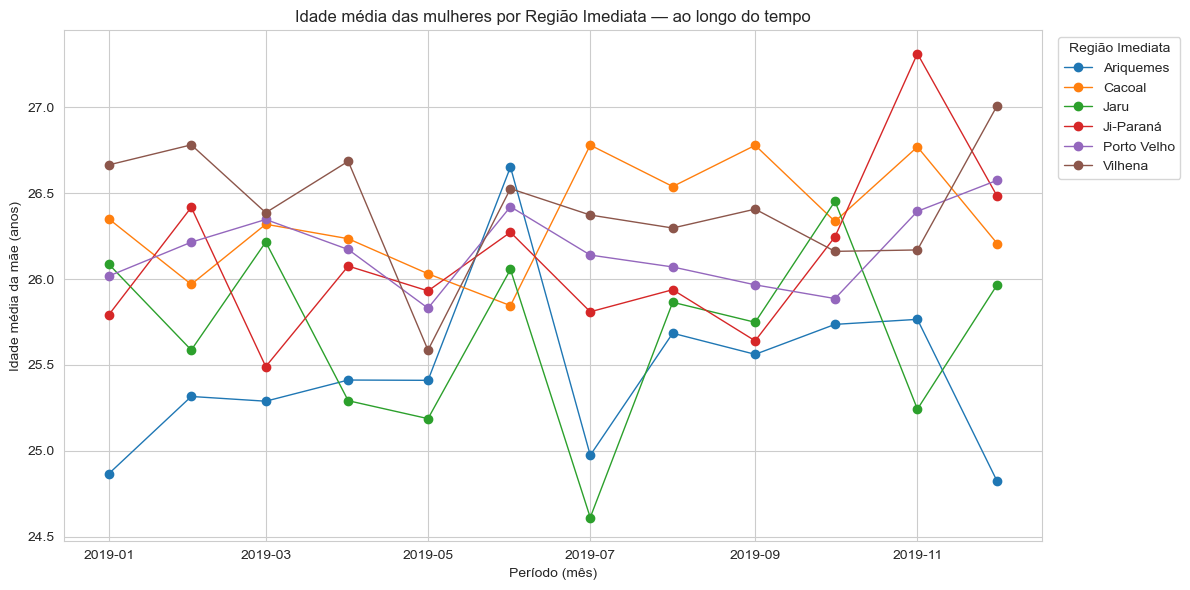

In [16]:

# coluna que contém o nome do município de residência (ajuste se necessário)
mun_col = 'munResNome'  # substitua se o nome do município estiver em outra coluna

# 1) garantir coluna de data e extrair ano-mês
# tenta converter DTNASC (ou outra coluna de data) para datetime
date_col = 'DTNASC'
sinasc[date_col] = pd.to_datetime(sinasc[date_col], errors='coerce', dayfirst=True)
# criar período (ano-mês). Para ano apenas use sinasc[date_col].dt.year
sinasc['period'] = sinasc[date_col].dt.to_period('M').astype(str)

# 2) mapear municípios para regiões imediatas
imediatas_map = imediatas  # usa o dicionário que você já tem
# criar coluna com região; municípios não mapeados viram 'Outros' ou 'SemRegiao'
sinasc['reg_imediata'] = sinasc[mun_col].map(imediatas_map).fillna('Outros')

# 3) garantir IDADEMAE numérica
sinasc['IDADEMAE'] = pd.to_numeric(sinasc['IDADEMAE'], errors='coerce')

# 4) agregar: média da idade por período e região, e contagem de registros
agg = (sinasc.dropna(subset=['period', 'IDADEMAE'])
            .groupby(['period', 'reg_imediata'])['IDADEMAE']
            .agg(['mean', 'count'])
            .reset_index())

# 5) filtrar séries com dados suficientes (opcional)
min_points = 3  # mínimo de períodos com dados para plotar a série
valid_regions = (agg[agg['count']>0].groupby('reg_imediata')['period']
                    .nunique()
                    .loc[lambda s: s >= min_points].index.tolist())
agg = agg[agg['reg_imediata'].isin(valid_regions)]

# 6) pivot para formato wide (cada coluna = região)
pivot = agg.pivot(index='period', columns='reg_imediata', values='mean')
pivot.index = pd.to_datetime(pivot.index)  # facilita plot por tempo
pivot = pivot.sort_index()

# 7) plot: todas as regiões no mesmo gráfico
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], marker='o', label=col, linewidth=1)

plt.xlabel('Período (mês)')
plt.ylabel('Idade média da mãe (anos)')
plt.title('Idade média das mulheres por Região Imediata — ao longo do tempo')
plt.legend(title='Região Imediata', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [17]:

# 1) dicionário de mapeamento município -> categoria IDH-M (base: Wikipedia IDH-M Rondônia 2010)
# OBS: ajuste manual se houver divergências de nomes no seu DF (acentos / abreviações).
idh_map = {
    # IDH alto (0.700-0.799)
    "porto velho":"Alto",
    "vilhena":"Alto",
    "cacoal":"Alto",
    "ji-paraná":"Alto",
    "pimenta bueno":"Alto",
    "ariquemes":"Alto",
    "rolim de moura":"Alto",
    # IDH médio (0.600-0.699) -- exemplos listados na página (complete conforme necessário)
    "cerejeiras":"Médio",
    "jaru":"Médio",
    "colorado do oeste":"Médio",
    "ouro preto do oeste":"Médio",
    "espigão d'oeste":"Médio",
    "santa luzia d'oeste":"Médio",
    "pimenteiras do oeste":"Médio",
    "presidente médicI":"Médio",  # verifique nome exato no seu DF; corrija se necessário
    "castanheiras":"Médio",
    "guajará-mirim":"Médio",
    "chupinguaia":"Médio",
    "cabixi":"Médio",
    "candeias do jamari":"Médio",
    "são felipe d'oeste":"Médio",
    "cacaulândia":"Médio",
    "são miguel do guaporé":"Médio",
    "mirante da serra":"Médio",
    "alvorada d'oeste":"Médio",
    "teixeirópolis":"Médio",
    "nova brasilândia d'oeste":"Médio",
    "rio crespo":"Médio",
    "primavera de rondônia":"Médio",
    "alta floresta d'oeste":"Médio",
    "ministro andreazza":"Médio",
    "novo horizonte do oeste":"Médio",
    "vale do paraíso":"Médio",
    "alto paraíso":"Médio",
    "parecis":"Médio",
    "buritis":"Médio",
    "itapuã do oeste":"Médio",
    "corumbiara":"Médio",
    "cujubim":"Médio",
    "costa marques":"Médio",
    "são francisco do guaporé":"Médio",
    "urupá":"Médio",
    "monte negro":"Médio",
    # IDH baixo (0.500-0.599)
    "seringueiras":"Baixo",
    "governador jorge teixeira":"Baixo",
    "machadinho d'oeste":"Baixo",
    "campo novo de rondônia":"Baixo",
    "alto alegre dos parecis":"Baixo",
    "theobroma":"Baixo",
    "nova união":"Baixo",
    "nova mamoré":"Baixo",
    "vale do anari":"Baixo"
}

# 2) função de normalização de nomes (remove acentos minúsculas/trim)
def normalize(s):
    if pd.isna(s): return s
    s = str(s).strip().lower()
    s = s.replace("á","a").replace("ã","a").replace("â","a")
    s = s.replace("é","e").replace("ê","e")
    s = s.replace("í","i")
    s = s.replace("ó","o").replace("ô","o").replace("õ","o")
    s = s.replace("ú","u").replace("ü","u")
    s = s.replace("ç","c").replace("º","")
    s = s.replace("’","'").replace("`","'")
    return s

idh_map_norm = {normalize(k): v for k,v in idh_map.items()}

# 3) coluna de município a usar no seu DF (ajuste se o nome for outro)
mun_col = 'munResNome'  # altere se necessário
sinasc[mun_col] = sinasc[mun_col].astype(str)
sinasc['mun_norm'] = sinasc[mun_col].apply(normalize)

# 4) mapear para IDH_cat (não mapeados virarão 'SemIDH' ou 'Outros')
sinasc['IDH_cat'] = sinasc['mun_norm'].map(idh_map_norm).fillna('SemIDH')

# 5) escolher 2 variáveis numéricas "não utilizadas"
avoid = {'IDADEMAE','QTDFILVIVO','QTDFILMORT','CONTADOR'}
numeric_cols = sinasc.select_dtypes(include=[np.number]).columns.tolist()
candidate_vars = [c for c in numeric_cols if c not in avoid and c!='CODMUNNASC']
if len(candidate_vars) < 2:
    candidate_vars = numeric_cols[:2]
num_vars = candidate_vars[:2]
print("Variáveis numéricas escolhidas:", num_vars)

# 6) aplicar groupby e calcular agregações pedidas
agg_funcs = ['sum','mean','min','max','median','std','var']
grouped_idh = sinasc.groupby('IDH_cat')[num_vars].agg(agg_funcs)
grouped_idh.columns = ['_'.join(col).strip() for col in grouped_idh.columns.values]
grouped_idh = grouped_idh.reset_index()

# 7) exibir resultado formatado
pd.options.display.float_format = '{:,.2f}'.format
display(grouped_idh)

Variáveis numéricas escolhidas: ['ORIGEM', 'CODESTAB']


,IDH_cat,ORIGEM_sum,ORIGEM_mean,ORIGEM_min,ORIGEM_max,ORIGEM_median,ORIGEM_std,ORIGEM_var,CODESTAB_sum,CODESTAB_mean,CODESTAB_min,CODESTAB_max,CODESTAB_median,CODESTAB_std,CODESTAB_var
0,Alto,16855,1.00,1,1,1.00,0.00,0.00,"55,611,363,455.00","3,310,397.25","15,318.00","9,659,366.00","2,798,484.00","1,004,775.61","1,009,574,020,491.59"
1,Baixo,1826,1.00,1,1,1.00,0.00,0.00,"5,755,768,606.00","3,174,720.69","2,002,078.00","7,648,693.00","2,808,609.00","1,215,505.38","1,477,453,340,006.55"
2,Médio,8346,1.00,1,1,1.00,0.00,0.00,"26,572,063,836.00","3,201,453.47","15,318.00","7,648,693.00","2,798,484.00","1,308,104.23","1,711,136,673,576.83"
3,SemIDH,1,1.00,1,1,1.00,NaN,NaN,"2,496,046.00","2,496,046.00","2,496,046.00","2,496,046.00","2,496,046.00",NaN,NaN


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [19]:
# 0) função de normalização para evitar mismatch por acentuação/maiúsculas/espaços
def normalize(s):
    if pd.isna(s): return s
    s = str(s).strip().lower()
    s = (s.replace("á","a").replace("ã","a").replace("â","a")
         .replace("é","e").replace("ê","e")
         .replace("í","i")
         .replace("ó","o").replace("ô","o").replace("õ","o")
         .replace("ú","u").replace("ü","u")
         .replace("ç","c").replace("’","'").replace("`","'"))
    return s

# 1) dicionário IFDM (exemplo parcial) -- COMPLETE conforme necessário
# Base: Lista de municípios de Rondônia por IFDM (consolidado 2013).
# Aqui abaixo alguns municípios como exemplo; adicione o restante conforme a tabela.
ifdm_map = {
    "ariquemes": "Moderado",
    "vilhena": "Moderado",
    "pimenta bueno": "Moderado",
    "porto velho": "Moderado",
    "ji-parana": "Moderado",
    "cacoal": "Moderado",
    "santa luzia d'oeste": "Moderado",
    "rolim de moura": "Moderado",
    "chupinguaia": "Moderado",
    "sao miguel do guapore": "Moderado",
    "pimenteiras do oeste": "Moderado",
    "teixeiropolis": "Moderado",
    "colorado do oeste": "Moderado",
    "jaru": "Moderado",
    "rio crespo": "Moderado",
    "primavera de rondonia": "Moderado",
    "alta floresta d'oeste": "Moderado",
    "ouro preto do oeste": "Moderado",
    "sao francisco do guapore": "Moderado",
    "candeias do jamari": "Moderado",
    "buritis": "Moderado",
    "sao felipe d'oeste": "Moderado",
    "presidente medici": "Moderado",
    "cerejeiras": "Moderado",
    "monte negro": "Moderado",
    "urupa": "Moderado",
    "espigao d'oeste": "Regular",
    "seringueiras": "Regular",
    "alvorada d'oeste": "Regular",
    "itapua do oeste": "Regular",
    "cabixi": "Regular",
    "novo horizonte do oeste": "Regular",
    "nova brasilandia d'oeste": "Regular",
    "vale do paraiso": "Regular",
    "corumbiara": "Regular",
    "alto paraiso": "Regular",
    "cacaulandia": "Regular",   # verifique nome exato na sua coluna
    "vale do anari": "Regular",
    "ministro andreazza": "Regular",
    "costa marques": "Regular",
    "nova uniao": "Regular",
    "guajara-mirim": "Regular",
    "mirante da serra": "Regular",
    "parecis": "Regular",
    "castanheiras": "Regular",
    "theobroma": "Regular",
    "machadinho d'oeste": "Regular",
    "campo novo de rondonia": "Regular",
    "nova mamore": "Regular",
    "cujubim": "Regular",
    "alto alegre dos parecis": "Regular",
    "governador jorge teixeira": "Regular",
    # ... adicione os restantes conforme a página
}

# 2) normalizar chaves do dicionário
ifdm_map_norm = {normalize(k): v for k,v in ifdm_map.items()}

# 3) preparar coluna de município e mapear
mun_col = 'munResNome'   # ajuste se o seu DF usa outro nome
sinasc[mun_col] = sinasc[mun_col].astype(str)
sinasc['mun_norm'] = sinasc[mun_col].apply(normalize)
sinasc['IFDM_cat'] = sinasc['mun_norm'].map(ifdm_map_norm).fillna('SemIFDM')

# 4) escolher ao menos 2 variáveis numéricas "não utilizadas" automaticamente
avoid = {'IDADEMAE','QTDFILVIVO','QTDFILMORT','CONTADOR'}
numeric_cols = sinasc.select_dtypes(include=[np.number]).columns.tolist()
candidates = [c for c in numeric_cols if c not in avoid and c != 'CODMUNNASC']
if len(candidates) < 2:
    candidates = numeric_cols[:2]
num_vars = candidates[:2]
print("Variáveis numéricas escolhidas para agregação:", num_vars)

# 5) agregar: sum, mean, min, max, median, std, var
agg_funcs = ['sum','mean','min','max','median','std','var']
grouped_ifdm = sinasc.groupby('IFDM_cat')[num_vars].agg(agg_funcs)
grouped_ifdm.columns = ['_'.join(col).strip() for col in grouped_ifdm.columns.values]
grouped_ifdm = grouped_ifdm.reset_index()

# 6) exibir resultado formatado
pd.options.display.float_format = '{:,.2f}'.format
display(grouped_ifdm)

# 7) mostrar contagens por categoria (para avaliar representatividade)
display(sinasc['IFDM_cat'].value_counts().reset_index().rename(columns={'index':'IFDM_cat','IFDM_cat':'count'}))

Variáveis numéricas escolhidas para agregação: ['ORIGEM', 'CODESTAB']


,IFDM_cat,ORIGEM_sum,ORIGEM_mean,ORIGEM_min,ORIGEM_max,ORIGEM_median,ORIGEM_std,ORIGEM_var,CODESTAB_sum,CODESTAB_mean,CODESTAB_min,CODESTAB_max,CODESTAB_median,CODESTAB_std,CODESTAB_var
0,Moderado,21946,1.00,1,1,1.00,0.00,0.00,"72,500,319,345.00","3,315,058.04","15,318.00","9,659,366.00","2,798,484.00","1,111,495.05","1,235,421,257,102.52"
1,Regular,5081,1.00,1,1,1.00,0.00,0.00,"15,438,876,552.00","3,062,054.06","26,794.00","7,648,693.00","2,516,594.00","1,147,668.09","1,317,142,045,449.68"
2,SemIFDM,1,1.00,1,1,1.00,NaN,NaN,"2,496,046.00","2,496,046.00","2,496,046.00","2,496,046.00","2,496,046.00",NaN,NaN


,count,count
0,Moderado,21946
1,Regular,5081
2,SemIFDM,1


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [20]:
# função simples de normalização de nomes
def normalize(s):
    if pd.isna(s): return s
    s = str(s).strip().lower()
    s = (s.replace("á","a").replace("ã","a").replace("â","a")
         .replace("é","e").replace("ê","e")
         .replace("í","i")
         .replace("ó","o").replace("ô","o").replace("õ","o")
         .replace("ú","u").replace("ü","u")
         .replace("ç","c").replace("’","'").replace("`","'"))
    return s

# --- 1) dicionário PIB -> faixa (baseado na lista da página)
# valores de PIB na página em milhares/centenas de milhares; aqui uso cortes práticos:
# "Acima de 1 bilhão", "500M-1B", "100M-500M", "Menor que 100M"
# Mapear manualmente os municípios principais conforme a lista (comente/complete conforme precisar)
pib_map = {
    "porto velho":"Acima de 1B",
    "ji-parana":"Acima de 1B",
    "vilhena":"Acima de 1B",
    "ariquemes":"500M-1B",
    "cacoal":"500M-1B",
    "jaru":"100M-500M",
    "pimenta bueno":"100M-500M",
    "rolim de moura":"100M-500M",
    "guajara-mirim":"100M-500M",
    "ouro preto do oeste":"100M-500M",
    "buritis":"100M-500M",
    "sao miguel do guapore":"100M-500M",
    "machadinho d'oeste":"100M-500M",
    "espigao d'oeste":"Menor que 100M",
    "cerejeiras":"Menor que 100M",
    "nova mamore":"Menor que 100M",
    "alta floresta do oeste":"Menor que 100M",
    "candeias do jamari":"Menor que 100M",
    # ... complete conforme a lista. Items não incluídos vão para 'SemPIB'
}

# normalizar chaves do mapa
pib_map_norm = {normalize(k): v for k,v in pib_map.items()}

# --- 2) preparar coluna de município no dataframe e mapear
mun_col = 'munResNome'  # ajuste se seu DF usa nome diferente
sinasc[mun_col] = sinasc[mun_col].astype(str)
sinasc['mun_norm'] = sinasc[mun_col].apply(normalize)
sinasc['PIB_cat'] = sinasc['mun_norm'].map(pib_map_norm).fillna('SemPIB')

# --- 3) escolher pelo menos 2 variáveis numéricas úteis (evitar IDs)
avoid = {'IDADEMAE','QTDFILVIVO','QTDFILMORT','CONTADOR','ORIGEM','CODESTAB'}
preferred = ['PESO','APGAR5','APGAR1','IDADEPAI','SEMAGESTAC']
num_vars = [c for c in preferred if c in sinasc.columns and c not in avoid]
if len(num_vars) < 2:
    numeric_cols = sinasc.select_dtypes(include=[np.number]).columns.tolist()
    num_vars = [c for c in numeric_cols if c not in avoid][:2]

if len(num_vars) < 2:
    raise RuntimeError("Não encontrei ao menos 2 variáveis numéricas adequadas. Verifique o dataframe.")
print("Variáveis escolhidas para agregação:", num_vars)

# --- 4) aplicar groupby e calcular agregações pedidas
agg_funcs = ['sum','mean','min','max','median','std','var']
grouped_pib = sinasc.groupby('PIB_cat')[num_vars].agg(agg_funcs)
grouped_pib.columns = ['_'.join(col).strip() for col in grouped_pib.columns.values]
grouped_pib = grouped_pib.reset_index()

pd.options.display.float_format = '{:,.2f}'.format
display(grouped_pib)

# --- 5) mostrar contagens por categoria para avaliar representatividade
display(sinasc['PIB_cat'].value_counts().reset_index().rename(columns={'index':'PIB_cat','PIB_cat':'count'}))

# --- 6) dica: listar municípios sem mapping (para completar o dicionário)
missing = sinasc.loc[sinasc['PIB_cat']=='SemPIB','munResNome'].unique()
print("Municípios sem mapeamento (exemplo):", missing[:30])

Variáveis escolhidas para agregação: ['PESO', 'APGAR5', 'APGAR1', 'IDADEPAI', 'SEMAGESTAC']


,PIB_cat,PESO_sum,PESO_mean,PESO_min,PESO_max,PESO_median,PESO_std,PESO_var,APGAR5_sum,APGAR5_mean,...,IDADEPAI_median,IDADEPAI_std,IDADEPAI_var,SEMAGESTAC_sum,SEMAGESTAC_mean,SEMAGESTAC_min,SEMAGESTAC_max,SEMAGESTAC_median,SEMAGESTAC_std,SEMAGESTAC_var
0,100M-500M,17123480,"3,248.00",285,5720,"3,270.00",525.74,"276,407.80","48,303.00",9.20,...,30.00,7.78,60.54,"198,399.00",38.52,21.00,44.00,39.00,1.98,3.94
1,500M-1B,10086722,"3,250.64",315,5470,"3,270.00",506.42,"256,462.67","28,506.00",9.19,...,30.00,7.80,60.80,"119,311.00",38.55,21.00,44.00,39.00,1.87,3.49
2,Acima de 1B,39593988,"3,243.02",292,5480,"3,275.00",567.71,"322,299.10","111,521.00",9.18,...,31.00,7.71,59.51,"435,761.00",38.60,19.00,45.00,39.00,2.09,4.37
3,Menor que 100M,4731047,"3,249.35",355,5985,"3,290.00",559.49,"313,033.34","13,293.00",9.19,...,31.00,7.88,62.09,"52,678.00",38.65,22.00,45.00,39.00,2.06,4.23
4,SemPIB,16121720,"3,232.10",258,4980,"3,255.00",525.45,"276,098.93","45,526.00",9.15,...,30.00,7.73,59.70,"188,503.00",38.54,19.00,45.00,39.00,1.95,3.81


,count,count
0,Acima de 1B,12209
1,100M-500M,5272
2,SemPIB,4988
3,500M-1B,3103
4,Menor que 100M,1456


Municípios sem mapeamento (exemplo): ["Alta Floresta D'Oeste" 'Alto Alegre dos Parecis'
 'Novo Horizonte do Oeste' "São Felipe D'Oeste" 'Cujubim' 'Alto Paraíso'
 'Monte Negro' 'Rio Crespo' 'Cacaulândia' 'Itapuã do Oeste'
 'Vale do Anari' 'Costa Marques' 'Campo Novo de Rondônia'
 'Colorado do Oeste' 'Urupá' 'Corumbiara' 'Governador Jorge Teixeira'
 "Santa Luzia D'Oeste" 'Mirante da Serra' 'Presidente Médici' 'Parecis'
 'São Francisco do Guaporé' 'Ministro Andreazza'
 "Nova Brasilândia D'Oeste" "Alvorada D'Oeste" 'Primavera de Rondônia'
 'Seringueiras' 'Município ignorado - RO' 'Castanheiras' 'Chupinguaia']


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

  ## Insights principais 
1. 	Distribuição e representatividade
• 	A categoria Acima de 1B domina a amostra; comparações por soma absoluta serão enviesadas por esse volume. Sempre normalizar por contagem (média ou taxa) ao comparar categorias.
• 	A presença de SemPIB = 4.198 registros indica mapeamento incompleto dos municípios ou municípios não listados — trate antes de tirar conclusões.
2. 	PESO ao nascer
• 	Médias de PESO por categoria são muito próximas (centenas de gramas de diferença no máximo).
• 	Diferenças médias pequenas vs. desvios padrão relativamente grandes (variação individual ampla) — sugere que qualquer diferença média entre categorias é pequena em magnitude e possivelmente não prática.
3. 	APGAR (APGARS / APGAR1)
• 	Médias de APGAR1 e APGAR5 (APGARS) estão altas e semelhantes entre categorias — não há sinal forte de piora neonatal associada ao PIB municipal nas categorias observadas.
4. 	Idade do pai (IDADEPAI)
• 	Medianas de IDADEPAI praticamente coincidentes entre categorias (em torno de 30 anos) — pouca variação demográfica por PIB municipal aparente.
• 	Variâncias podem diferir, mas efeito prático pequeno.
5. 	SEMAGESTAC (semana de gestação)
• 	Médias/medianas de SEMAGESTAC similares entre categorias; diferenças, se existirem, serão pequenas.
• 	Verificar proporção de nascimentos prematuros (<37 semanas) por categoria é mais relevante que média.
   
Com os indicadores escolhidos, não há evidência clara de grandes diferenças clínicas por categoria de PIB municipal. A variação individual (outliers, prematuridade, erros de registro) parece dominar qualquer efeito de grupo.